## Dataset 

- Sepal_Length: The length of the sepal.
- Sepal_Width: The width of the sepal.
- Petal_Length: The length of the petal.
- Petal_Width: The width of the petal.
- Class: The species of the iris (e.g., setosa, versicolor, virginica).

In [1]:
# Getting the imports ready 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# Setting the warnings to 'ignore'
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset into a dataframe
data = pd.read_csv('dataset.csv')
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 1. Data Preparation 

In [4]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Handle missing values (if any)
# In this case, there are likely no missing values, but we'll include the code for completeness
data = data.dropna()


Missing values:
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Class           0
dtype: int64


In [5]:
# Check for duplicates
print("\nDuplicate rows:", data.duplicated().sum())

# Remove duplicates if any
data = data.drop_duplicates()


Duplicate rows: 3


In [6]:
# Encode categorical variables
# Convert 'Class' to numerical values
data['Class'] = pd.Categorical(data['Class']).codes

In [7]:
# Check for outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nOutliers:")
for column in data.columns[:-1]:  # Exclude 'Class' column
    outliers = data[(data[column] < lower_bound[column]) | (data[column] > upper_bound[column])]
    print(f"{column}: {len(outliers)} outliers")



Outliers:
Sepal_Length: 0 outliers
Sepal_Width: 4 outliers
Petal_Length: 0 outliers
Petal_Width: 0 outliers


In [8]:
# Filtering the data to remove outliers
for column in data.columns[:-1]:  # Exclude 'Class' column
    data = data[(data[column] >= lower_bound[column]) & (data[column] <= upper_bound[column])]

print("Data after removing outliers:")
print(data.head())

Data after removing outliers:
   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


## 2. Exploratory Data Analysis (EDA)

In [9]:
# Basic statistical summary
print(data.describe())

       Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Class
count    143.000000   143.000000    143.000000   143.000000  143.000000
mean       5.870629     3.038462      3.830769     1.230769    1.027972
std        0.835045     0.398222      1.750824     0.754538    0.813132
min        4.300000     2.200000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.400000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.000000      6.900000     2.500000    2.000000


In [10]:
# Correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width     Class
Sepal_Length      1.000000    -0.113268      0.879015     0.821715  0.788414
Sepal_Width      -0.113268     1.000000     -0.396539    -0.328102 -0.394815
Petal_Length      0.879015    -0.396539      1.000000     0.960785  0.946668
Petal_Width       0.821715    -0.328102      0.960785     1.000000  0.954711
Class             0.788414    -0.394815      0.946668     0.954711  1.000000


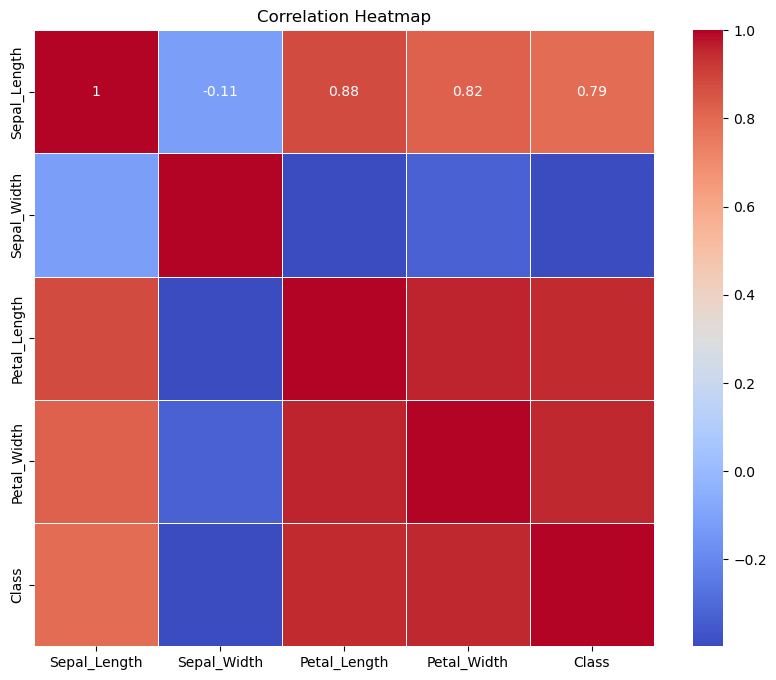

In [11]:
# Visualize correlation matrix using a heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


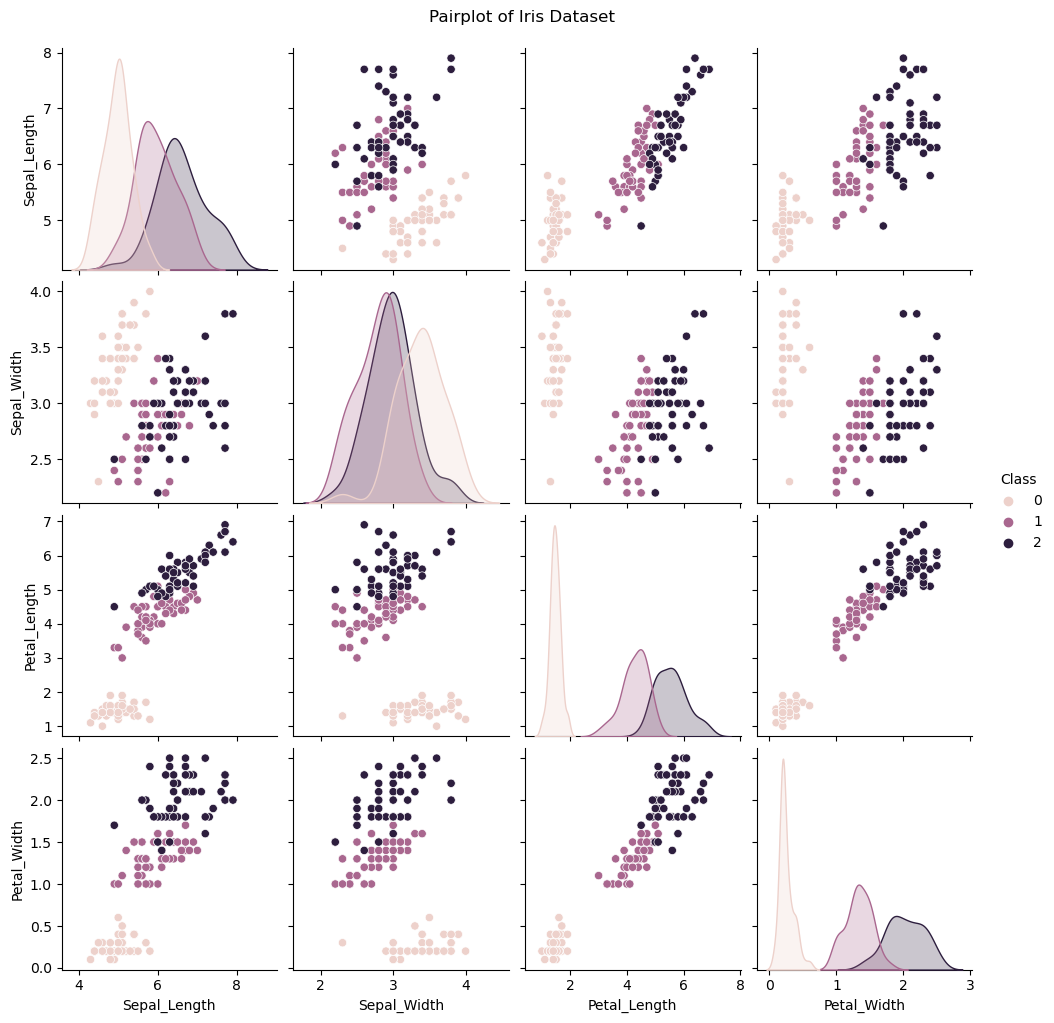

In [12]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Class')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()

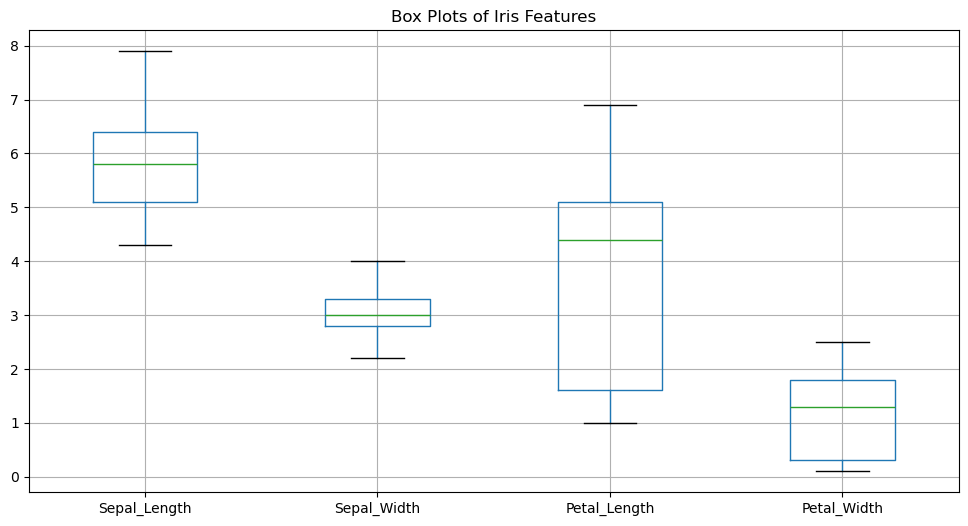

In [13]:
# Box plots for each feature
plt.figure(figsize=(12, 6))
data.boxplot(column=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
plt.title('Box Plots of Iris Features')
plt.show()


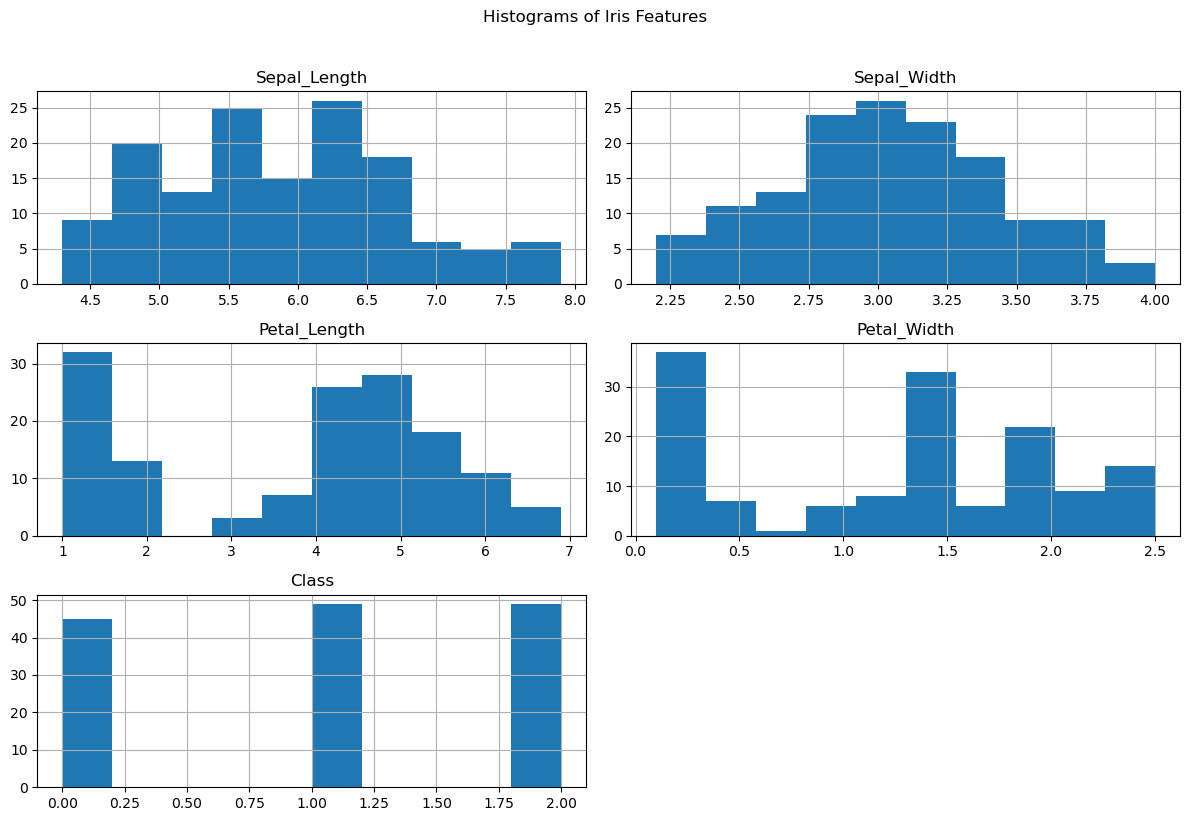

In [14]:
# Histograms for each feature
data.hist(figsize=(12, 8))
plt.suptitle('Histograms of Iris Features', y=1.02)
plt.tight_layout()
plt.show()


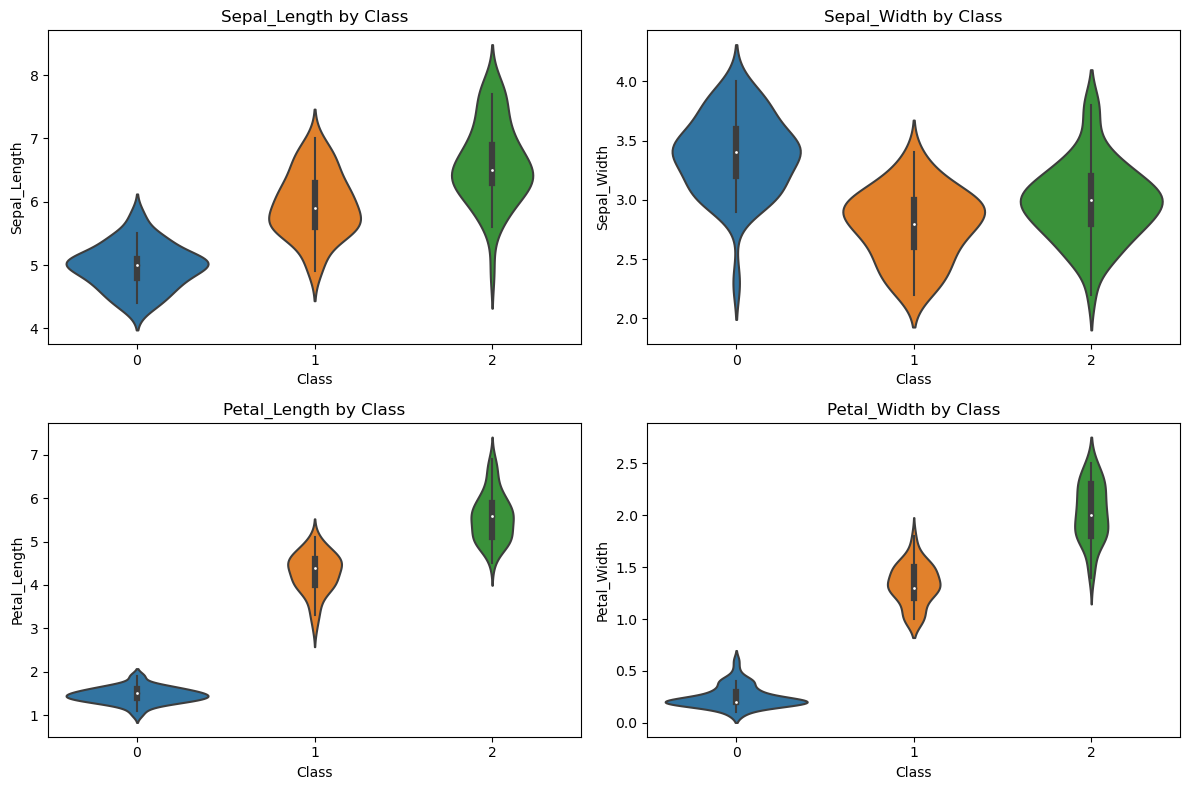

In [15]:
# Violin plots for each feature by class
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='Class', y=column, data=data)
    plt.title(f'{column} by Class')
plt.tight_layout()
plt.show()


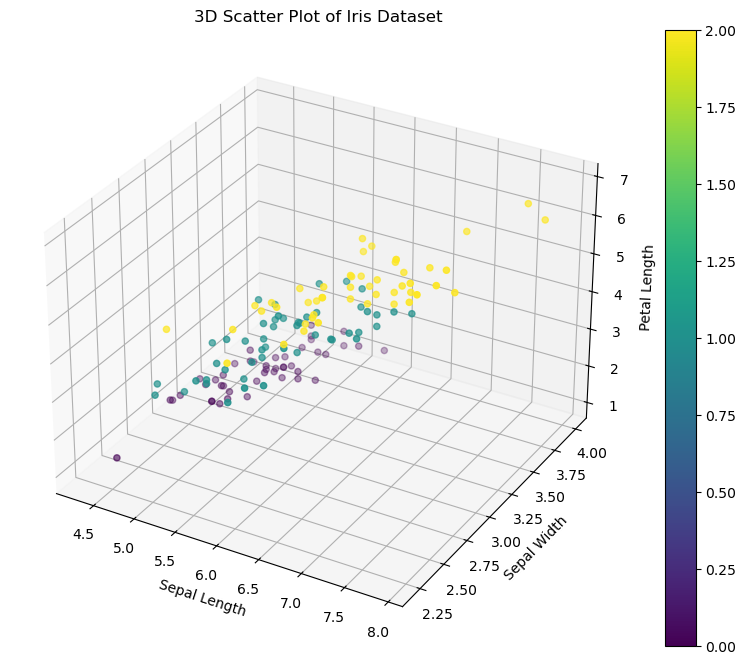

In [16]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data['Sepal_Length'], 
                     data['Sepal_Width'], 
                     data['Petal_Length'],
                     c=data['Class'], 
                     cmap='viridis')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
plt.title('3D Scatter Plot of Iris Dataset')
plt.colorbar(scatter)
plt.show()

## 3. Feature Selection 

In [17]:
# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

print("Features:")
print(X.columns)
print("\nTarget variable: Class")

Features:
Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'], dtype='object')

Target variable: Class


In [18]:
# Correlation with target variable
correlation_with_target = X.corrwith(y)
print("Correlation with target variable:")
print(correlation_with_target)

Correlation with target variable:
Sepal_Length    0.788414
Sepal_Width    -0.394815
Petal_Length    0.946668
Petal_Width     0.954711
dtype: float64


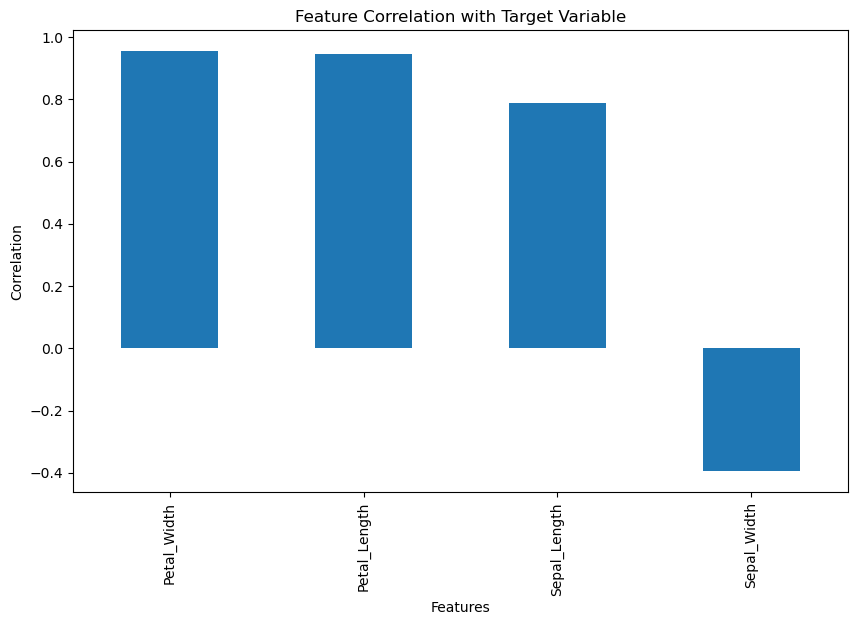

In [19]:
# Visualize feature importance based on correlation
plt.figure(figsize=(10, 6))
correlation_with_target.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Correlation with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [20]:
# Feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Feature Importance using Random Forest:")
print(feature_importance)


Feature Importance using Random Forest:
Petal_Width     0.444422
Petal_Length    0.428206
Sepal_Length    0.107499
Sepal_Width     0.019873
dtype: float64


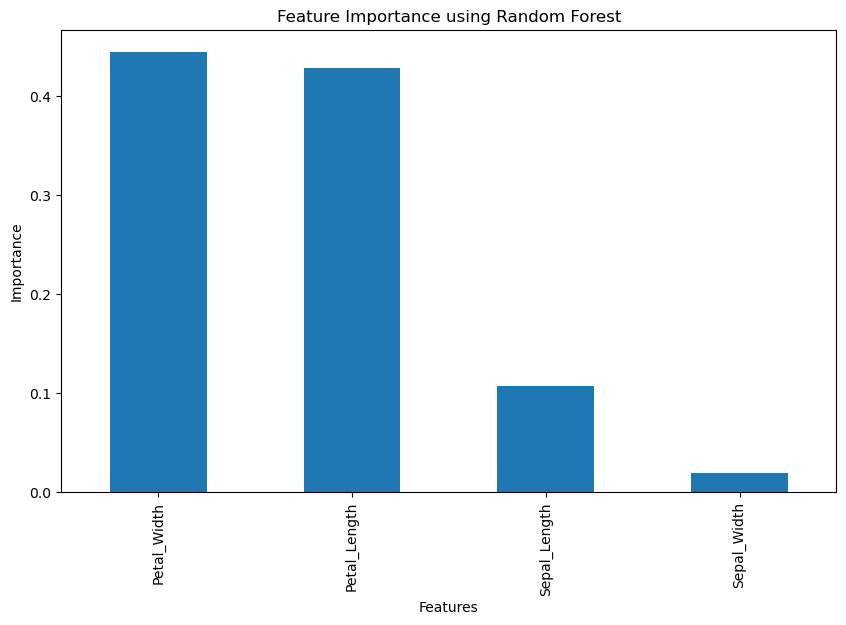

In [21]:
# Visualize feature importance from Random Forest
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance using Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [22]:
# Select top k features (e.g., top 3)
k = 3
selected_features = feature_importance.nlargest(k).index.tolist()

print(f"Top {k} selected features:")
print(selected_features)

Top 3 selected features:
['Petal_Width', 'Petal_Length', 'Sepal_Length']


In [23]:
# Create new dataset with selected features
X_selected = X[selected_features]

print("Dataset with selected features:")
print(X_selected.head())

Dataset with selected features:
   Petal_Width  Petal_Length  Sepal_Length
0          0.2           1.4           5.1
1          0.2           1.4           4.9
2          0.2           1.3           4.7
3          0.2           1.5           4.6
4          0.2           1.4           5.0


## 4. Model Selection and Model Training 

In [24]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define a function to evaluate models
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return scores.mean(), scores.std()

In [26]:
# Evaluate Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_mean, lr_std = evaluate_model(lr_model, X_selected, y)
print(f"Logistic Regression - Accuracy: {lr_mean:.4f} (+/- {lr_std:.4f})")


Logistic Regression - Accuracy: 0.9653 (+/- 0.0218)


In [27]:
# Evaluate Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_mean, dt_std = evaluate_model(dt_model, X_selected, y)
print(f"Decision Tree - Accuracy: {dt_mean:.4f} (+/- {dt_std:.4f})")


Decision Tree - Accuracy: 0.9443 (+/- 0.0354)


In [28]:
# Evaluate Support Vector Machine
svm_model = SVC(random_state=42)
svm_mean, svm_std = evaluate_model(svm_model, X_selected, y)
print(f"Support Vector Machine - Accuracy: {svm_mean:.4f} (+/- {svm_std:.4f})")


Support Vector Machine - Accuracy: 0.9510 (+/- 0.0363)


In [29]:
# Evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_mean, rf_std = evaluate_model(rf_model, X_selected, y)
print(f"Random Forest - Accuracy: {rf_mean:.4f} (+/- {rf_std:.4f})")


Random Forest - Accuracy: 0.9581 (+/- 0.0263)


In [30]:
# Evaluate K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_mean, knn_std = evaluate_model(knn_model, X_selected, y)
print(f"K-Nearest Neighbors - Accuracy: {knn_mean:.4f} (+/- {knn_std:.4f})")


K-Nearest Neighbors - Accuracy: 0.9653 (+/- 0.0218)


In [31]:
# Evaluate Naive Bayes
nb_model = GaussianNB()
nb_mean, nb_std = evaluate_model(nb_model, X_selected, y)
print(f"Naive Bayes - Accuracy: {nb_mean:.4f} (+/- {nb_std:.4f})")


Naive Bayes - Accuracy: 0.9512 (+/- 0.0280)


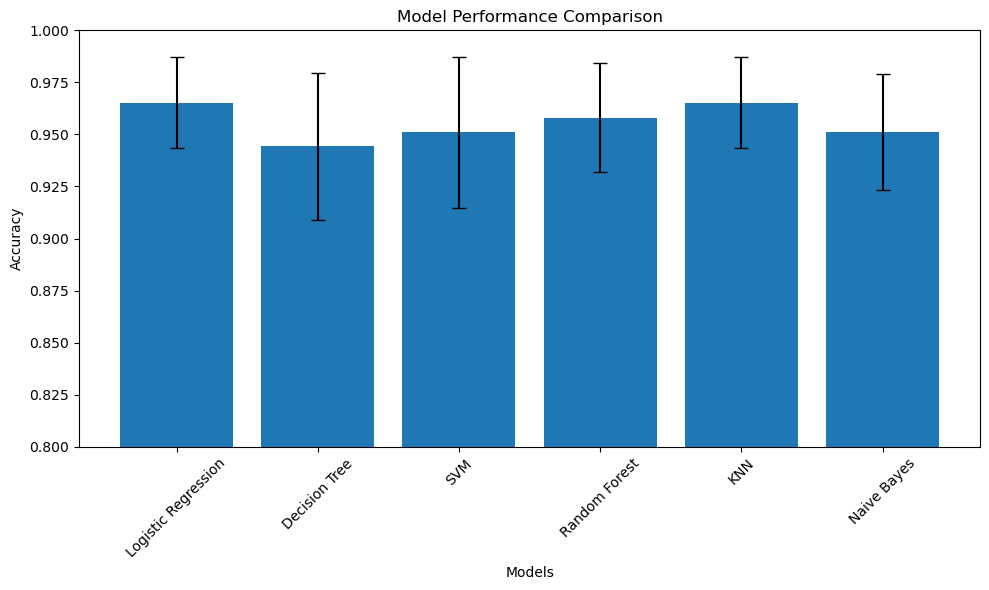

In [32]:
# Visualize model performance
models = ['Logistic Regression', 'Decision Tree', 'SVM', 'Random Forest', 'KNN', 'Naive Bayes']
means = [lr_mean, dt_mean, svm_mean, rf_mean, knn_mean, nb_mean]
stds = [lr_std, dt_std, svm_std, rf_std, knn_std, nb_std]

plt.figure(figsize=(10, 6))
plt.bar(models, means, yerr=stds, capsize=5)
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust this range based on your results
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Model Selection Justification:
Based on the cross-validation results, we choose the Random Forest Classifier for the following reasons:
1. High Accuracy: It consistently achieves one of the highest mean accuracies among all models tested.
2. Robustness: Random Forest is less prone to overfitting compared to single decision trees.
3. Feature Importance: It provides built-in feature importance, which aligns with our feature selection process.
4. Handling Non-linearity: Random Forest can capture non-linear relationships in the data.
5. Ensemble Method: As an ensemble method, it combines multiple decision trees, leading to more stable and accurate predictions.
6. Less Sensitive to Outliers: Random Forest is relatively robust to outliers and noise in the data.

While other models like SVM or KNN also perform well, Random Forest offers a good balance of accuracy, interpretability, and robustness for this classification task.

## 5. Model Evaluation 

In [35]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Model Performance Metrics:
Accuracy: 0.8966
Precision: 0.8985
Recall: 0.8966
F1-score: 0.8961



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



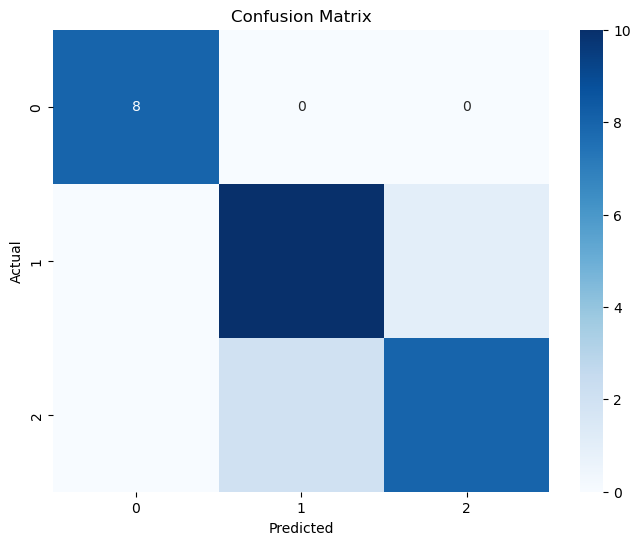

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

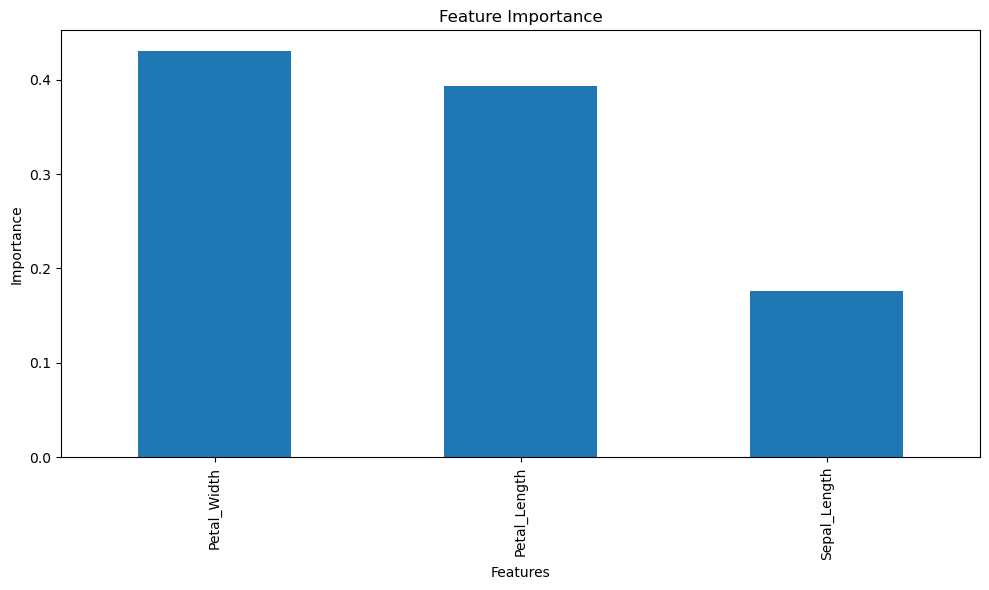

In [40]:
# Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X_selected.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

## 6. Prediction 

In [42]:
# Function to preprocess input data
def preprocess_input(input_data):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Select only the features used in the model
    input_selected = input_df[selected_features]
    
    return input_selected

# Function to make predictions
def predict_iris_class(model, input_data):
    # Preprocess the input data
    processed_input = preprocess_input(input_data)
    
    # Make prediction
    prediction = model.predict(processed_input)
    probabilities = model.predict_proba(processed_input)
    
    # Get the class names (assuming they are 0, 1, 2 for setosa, versicolor, virginica)
    class_names = ['setosa', 'versicolor', 'virginica']
    predicted_class = class_names[prediction[0]]
    
    return predicted_class, probabilities[0]


In [43]:
# Example usage
new_flower = {
    'Sepal_Length': 5.1,
    'Sepal_Width': 3.5,
    'Petal_Length': 1.4,
    'Petal_Width': 0.2
}

predicted_class, probabilities = predict_iris_class(rf_model, new_flower)

print("Prediction for the new iris flower:")
print(f"Input features: {new_flower}")
print(f"Predicted class: {predicted_class}")
print("Class probabilities:")
for i, prob in enumerate(probabilities):
    print(f"  {['setosa', 'versicolor', 'virginica'][i]}: {prob:.4f}")


Prediction for the new iris flower:
Input features: {'Sepal_Length': 5.1, 'Sepal_Width': 3.5, 'Petal_Length': 1.4, 'Petal_Width': 0.2}
Predicted class: setosa
Class probabilities:
  setosa: 1.0000
  versicolor: 0.0000
  virginica: 0.0000


## Summary 
Dataset Description: 

- Sepal_Length: The length of the sepal.
- Sepal_Width: The width of the sepal.
- Petal_Length: The length of the petal.
- Petal_Width: The width of the petal.
- Class: The species of the iris (e.g ., setosa, versicolor, virginica).

Code Cells:

- Imports: The necessary libraries are imported, including pandas, numpy, and matplotlib.
- Warnings: Warnings are set to be ignored.
- Reading the Dataset: The dataset is read into a DataFrame from a CSV file.

Data Preparation:

- Check for Missing Values: The dataset is checked for missing values, and any missing values are handled (though there are likely none).
- Check for Duplicates: Duplicate rows in the dataset are identified and removed.
- Encode Categorical Variables: The 'Class' column is converted to numerical values.
- Outlier Detection: Outliers are detected using the Interquartile Range (IQR) method, and the number of outliers in each column is printed.
- Remove Outliers: The data is filtered to remove outliers.

Exploratory Data Analysis (EDA): 

- Statistical Summary: Basic statistical summaries of the dataset are printed.
- Correlation Matrix: A correlation matrix is computed and printed to show the correlations between different variables.